In [74]:
# !pip install earthpy
!pip install setuptools

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [84]:
import numpy as np
import osmnx as ox
from shapely.geometry import Point
import geopandas as gpd
import requests
import json
import matplotlib.pyplot as plt
import earthpy.plot as ep

In [2]:
colored_image= np.array([[2, 2, 3, 3], [3, 8, 0, 6],[4, 2, 5, 0], [7, 3, 6, 7], [3, 4, 9, 3]])
one_dimensional_array =  np.array([32, 67, 53, 85, 17, 52, 77, 67, 31, 64, 50, 74, 87, 28, 86,  8, 48, 25, 92, 32])

In [5]:
reshaped_array = one_dimensional_array.reshape(colored_image.shape)

reshaped_array

array([[32, 67, 53, 85],
       [17, 52, 77, 67],
       [31, 64, 50, 74],
       [87, 28, 86,  8],
       [48, 25, 92, 32]])

In [6]:
img = np.array([
    [ 57,  56, 144,  59, 118],
    [214,  88, 175,  91, 117],
    [185,  68, 127,  72, 247],
    [ 18,  33, 149, 112,  44],
    [127,  65, 238,   9,  46]
])

In [9]:
classified_image = np.where(img < 50, 0, np.where(img < 100, 1, np.where(img < 150, 2, 3)))

classified_image

array([[1, 1, 2, 1, 2],
       [3, 1, 3, 1, 2],
       [3, 1, 2, 1, 3],
       [0, 0, 2, 2, 0],
       [2, 1, 3, 0, 0]])

In [27]:
addresses = [
  "119, Fortescue Street,Mahia, Wairoa District",
  # "11, Pukenui Drive,Mahia, Wairoa District",
  "133, Mangaone Road,Nuhaka, Wairoa District",
]

In [28]:
geom = []

for address in addresses:
  res = ox.geocode(address)
  if res is not None:    
    y, x = res    
    point = Point(x, y)
    
    print(f'{point} : {address}')
    
#     geom.append(geom)
    
# gdf = gpd.GeoDataFrame({ 'address': addresses }, geometry=geom, crs=4326)

# print(gdf)
    
    

POINT (177.8705609 -39.0913206) : 119, Fortescue Street,Mahia, Wairoa District
POINT (177.754384 -39.0124953) : 133, Mangaone Road,Nuhaka, Wairoa District


In [31]:
original_ndarray = np.array([[176, 204, 134, 123],
                            [199,  93, 176,  88],
                            [128, 170,  10, 227],
                            [131, 100, 240, 194],
                            [181,  88, 165, 221]])
                            
same_ndarray = np.array([[20,20,20],[20,20,20],[20,20,20]])

In [34]:
def scale_0_1(arr):
  max = np.max(arr)
  min = np.min(arr)
  
  if max == min: return "Your array has a single value!"
  
  return ((arr - min) / (max - min))  

In [35]:
scale_0_1(original_ndarray)

array([[0.72173913, 0.84347826, 0.53913043, 0.49130435],
       [0.82173913, 0.36086957, 0.72173913, 0.33913043],
       [0.51304348, 0.69565217, 0.        , 0.94347826],
       [0.52608696, 0.39130435, 1.        , 0.8       ],
       [0.74347826, 0.33913043, 0.67391304, 0.9173913 ]])

In [36]:
scale_0_1(same_ndarray)

'Your array has a single value!'

In [37]:
endpoint = 'https://gis.ccc.govt.nz/server/rest/services/OpenData/StormWater/FeatureServer/1/query?where=1%3D1&outFields=*&geometry=1565912,5180066,1566065,5180828&geometryType=esriGeometryEnvelope&inSR=2193&spatialRel=esriSpatialRelIntersects&outSR=4326&f=geojson'


In [ ]:
response = requests.get(endpoint)

data = response.json()

In [44]:
print(json.dumps(data, indent=2))

{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "id": 32102,
      "geometry": {
        "type": "LineString",
        "coordinates": [
          [
            172.57991698152964,
            -43.52481062242926
          ],
          [
            172.57986190755537,
            -43.52476801005867
          ]
        ]
      },
      "properties": {
        "SwPipeID": 32102,
        "Type": "Gravity",
        "ServiceStatus": "In Service",
        "Ownership": "Private",
        "Responsibility": "Private",
        "Maintenance": "Private",
        "LocationCertainty": "Accurate",
        "InstallationCompany": null,
        "Manufacturer": null,
        "NominalDiameter": 150,
        "DiameterDescription": "150mm",
        "Construction": null,
        "ConstructionDescription": null,
        "PressureClass": null,
        "StiffnessClass": null,
        "LoadClass": null,
        "SwPipeShape": "Circle",
        "InstallationMethod": null,
    

In [46]:
len(data['features'])

82

In [48]:
first_pipe = data['features'][0]

print(json.dumps(first_pipe, indent=4))

{
    "type": "Feature",
    "id": 32102,
    "geometry": {
        "type": "LineString",
        "coordinates": [
            [
                172.57991698152964,
                -43.52481062242926
            ],
            [
                172.57986190755537,
                -43.52476801005867
            ]
        ]
    },
    "properties": {
        "SwPipeID": 32102,
        "Type": "Gravity",
        "ServiceStatus": "In Service",
        "Ownership": "Private",
        "Responsibility": "Private",
        "Maintenance": "Private",
        "LocationCertainty": "Accurate",
        "InstallationCompany": null,
        "Manufacturer": null,
        "NominalDiameter": 150,
        "DiameterDescription": "150mm",
        "Construction": null,
        "ConstructionDescription": null,
        "PressureClass": null,
        "StiffnessClass": null,
        "LoadClass": null,
        "SwPipeShape": "Circle",
        "InstallationMethod": null,
        "UpstreamFeature": "SwInlet",
     

In [49]:
stormwater_pipes = data['features']

stormwater_pipes

[{'type': 'Feature',
  'id': 32102,
  'geometry': {'type': 'LineString',
   'coordinates': [[172.57991698152964, -43.52481062242926],
    [172.57986190755537, -43.52476801005867]]},
  'properties': {'SwPipeID': 32102,
   'Type': 'Gravity',
   'ServiceStatus': 'In Service',
   'Ownership': 'Private',
   'Responsibility': 'Private',
   'Maintenance': 'Private',
   'LocationCertainty': 'Accurate',
   'InstallationCompany': None,
   'Manufacturer': None,
   'NominalDiameter': 150,
   'DiameterDescription': '150mm',
   'Construction': None,
   'ConstructionDescription': None,
   'PressureClass': None,
   'StiffnessClass': None,
   'LoadClass': None,
   'SwPipeShape': 'Circle',
   'InstallationMethod': None,
   'UpstreamFeature': 'SwInlet',
   'DownstreamFeature': 'SwInlet',
   'Treatment': None,
   'TreatmentConstruction': None,
   'TreatmentInstallationCompany': None,
   'SurveyDate': None,
   'CommissionDate': None,
   'DecommissionDate': None,
   'InsideDiameter': None,
   'NominalHeight

In [53]:
gdf_storm_4326 = gpd.GeoDataFrame.from_features(stormwater_pipes, crs=4326)

gdf_storm = gdf_storm_4326.to_crs(epsg=2193)

gdf_storm

,geometry,SwPipeID,Type,ServiceStatus,Ownership,Responsibility,Maintenance,LocationCertainty,InstallationCompany,Manufacturer,...,PipeName,PipeLabel,drvLength,Comment,Project,ContractorExternalReference,SAPInternalReference,CreateDate,LastEditDate,Shape__Length
0,"LINESTRING (1566052.564 5180817.489, 1566048.0...",32102,Gravity,In Service,Private,Private,Private,Accurate,None,None,...,None,Ø150,6.5,None,None,None,IF?0100000000001450014,NaN,1343238246000,6.496557
1,"LINESTRING (1566005.387 5180613.127, 1566004.2...",78351,Gravity,In Service,CCC,Road Asset Operations,Road Asset Operations,Accurate,None,None,...,None,Ø225 RCRR 1995,1.1,None,None,None,IE000000000010918049,1.379474e+12,1380210918000,1.094913
2,"LINESTRING (1566053.795 5180341.55, 1566053.76...",21430,Gravity,In Service,CCC,Land Drainage Operations,Land Drainage Operations,Non Verified,None,None,...,None,Ø450 RCRR 1987,90.2,None,EP10600,None,IE000000000010220807,NaN,1565744120000,90.243963
3,"LINESTRING (1566044.877 5180464.173, 1566043.5...",21422,Gravity,In Service,CCC,Land Drainage Operations,Land Drainage Operations,Non Verified,None,None,...,None,Ø225 RCRR 1994,38.7,None,EP12306,None,IE000000000010220789,NaN,1521523923000,38.729101
4,"LINESTRING (1566047.5 5180245.102, 1566054.926...",21413,Gravity,In Service,CCC,Road Asset Operations,Road Asset Operations,Unknown,None,None,...,None,Ø450 RCRR 1987,11.4,None,EP12306,None,IE000000000010220769,NaN,1402262258000,11.385799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,"LINESTRING (1566036.689 5180417.401, 1566046.2...",21421,Gravity,In Service,CCC,Land Drainage Operations,Land Drainage Operations,Unknown,None,None,...,None,Ø375 RCRR 1968,11.6,None,EP4529,None,IE000000000010220787,NaN,1343238246000,11.590805
78,"LINESTRING (1566065.276 5180163.923, 1566065.0...",21427,Gravity,In Service,CCC,Road Asset Operations,Road Asset Operations,Non Verified,None,None,...,None,Ø375 RCRR 1994,59.9,None,EP12306,None,IE000000000010220799,NaN,1378096222000,59.893623
79,"LINESTRING (1566020.646 5180556.897, 1566016.7...",78339,Gravity,In Service,CCC,Road Asset Operations,Road Asset Operations,Accurate,None,None,...,None,Ø225 UPVC 2013,37.0,None,None,None,IE000000000010918037,1.379474e+12,1380210918000,36.954242
80,"LINESTRING (1566027.19 5180500.807, 1566029.00...",98120,Arch Culvert,In Service,CCC,Road Asset Operations,Road Asset Operations,Unknown,None,None,...,None,Ø750 CONC 1930,1.8,None,EP12306,None,IE000000000011489817,1.648520e+12,1648786679000,1.844305


In [55]:
print(type(gdf_storm))

<class 'geopandas.geodataframe.GeoDataFrame'>


<Axes: >

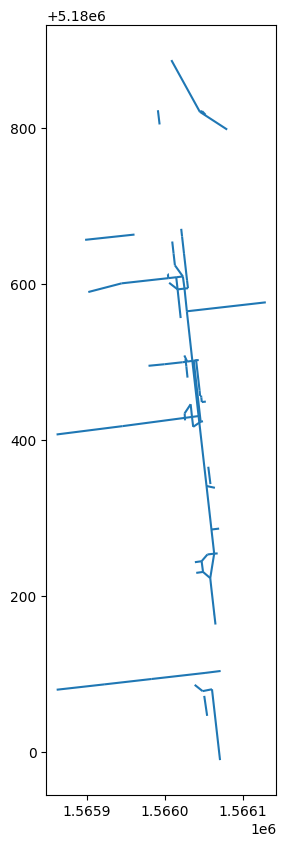

In [60]:
fig, ax = plt.subplots(figsize = (10, 10))

gdf_storm.plot(ax = ax)

In [98]:
import rasterio as rio

with rio.open('NCRS_atmcorr2017-12-27.tif') as data:
  meta = data.meta
  num_bands = data.count
  crs = data.crs
  
  nir = data.read(1)
  green = data.read(2)
  blue = data.read(3)
  red = data.read(4)
  
  print(meta)
  print(data.res)
  print(num_bands)
  print(crs)
  print(data.read().shape)


{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 102, 'height': 102, 'count': 4, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 60S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",177],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32760"]]'), 'transform': Affine(10.0, 0.0, 356320.0,
       0.0, -10.0, 5811730.0)}
(10.0, 10.0)
4
EPSG:32760
(4, 102, 102)


In [99]:
ndvi = np.divide((nir - red), (nir + red))

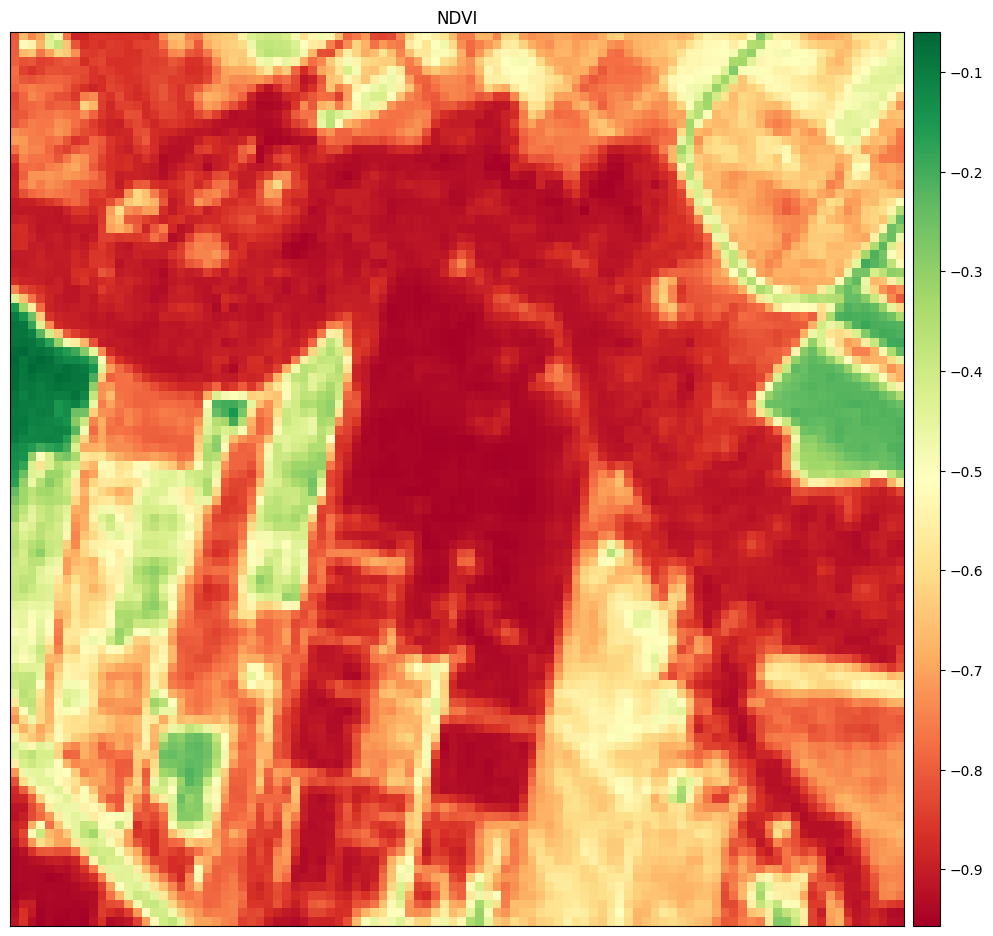

<Axes: title={'center': 'NDVI'}>

In [100]:
ep.plot_bands(
  ndvi,
  cmap='RdYlGn',
  title=['NDVI']
)

In [101]:
meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 102,
 'height': 102,
 'count': 4,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 60S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",177],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32760"]]'),
 'transform': Affine(10.0, 0.0, 356320.0,
        0.0, -10.0, 5811730.0)}

In [102]:
out_meta = meta

out_meta.update({"dtype": ndvi.dtype, "count": 1, "nodata": -999})

out_meta

{'driver': 'GTiff',
 'dtype': dtype('float64'),
 'nodata': -999,
 'width': 102,
 'height': 102,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 60S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",177],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32760"]]'),
 'transform': Affine(10.0, 0.0, 356320.0,
        0.0, -10.0, 5811730.0)}